<a href="https://colab.research.google.com/github/BD157/MLE-Capstone-BD/blob/main/Models_in_Google_Colab_Model_Building_BD_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Model Building
# Word2Vec

We use a merged dataset instead of separate datasets, this is important cause it keeps everything organized and ensures that each nucleotide sequence from the FASTA files is correctly linked to its Accession ID and related metadata, such as collection date, location, and lineage. Without merging, sequences might be analyzed without their proper context, leading to incomplete or misleading results. It also prevents data loss or mismatched relationships that could happen if sequences and metadata are processed separately and then merged later. Additionally, working with a merged dataset makes feature extraction and model training more efficient since k-mers, embeddings, and metadata-based features can be generated in one step. This approach also simplifies filtering out low-quality sequences before training, eliminating the need for constant cross-referencing between multiple datasets.

In [2]:
!pip install "numpy<2.0"
!pip install biopython gensim scikit-learn umap-learn tqdm pandas matplotlib seaborn

In [3]:
# #Install required packages and necessary libraries
# !pip install biopython gensim scikit-learn umap-learn tqdm pandas matplotlib seaborn

# ****************
# !pip install "numpy<2.0"
# !pip install biopython gensim scikit-learn umap-learn tqdm pandas matplotlib seaborn
# ****************


# # Clean uninstall of numpy and related compiled packages
# !pip uninstall -y numpy scikit-learn umap-learn gensim

# # Install a working version of NumPy FIRST
# !pip install numpy==1.24.4

# # Install remaining libraries after numpy is locked in
# !pip install biopython gensim==4.3.1 scikit-learn==1.2.2 umap-learn tqdm pandas matplotlib seaborn --no-cache-dir --force-reinstall


In [ ]:
# Restart runtime programmatically
# import os
# os._exit(00)

In [2]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
from tqdm import tqdm
from sklearn.cluster import DBSCAN
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip uninstall -y scipy
!pip install scipy==1.10.1 --no-cache-dir --force-reinstall


Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 199.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 307.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have s

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import numpy as np
from gensim.models import Word2Vec
import scipy
print("NumPy:", np.__version__)
print("Gensim Word2Vec OK")
print("SciPy:", scipy.__version__)


NumPy: 1.26.4
Gensim Word2Vec OK
SciPy: 1.10.1


In [ ]:
# import pickle

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Define the path
# load_path = "/content/drive/My Drive/Sequence Data/merged_df.pkl"

# # Load the DataFrame
# with open(load_path, 'rb') as f:
#     merged_df = pickle.load(f)

# print(f"DataFrame loaded successfully with shape: {merged_df.shape}")

In [2]:
from google.colab import drive
# Mound Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
# Path where files are stored on the Google Drive
drive_folder = "/content/drive/My Drive/Sequence Data/"
# List files in the folder and verify file names
print(os.listdir(drive_folder))

['Second3m_2022_sequences.acc', 'Second3m_2022_sequences.csv', 'Second3m_2022_sequences.fasta', 'merged_df.pkl', 'merged_df_large.csv', 'merged_df_sampled.csv']


In [8]:
import pandas as pd
# Read the CSV file
merged_df2 = pd.read_csv('/content/drive/MyDrive/Sequence Data/merged_df_large.csv')

# Randomly select 1000 rows
merged_df = merged_df2.sample(n=1000, random_state=42)

<ipython-input-8-2b860fc45a07>:3: DtypeWarning: Columns (3,9,17,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df2 = pd.read_csv('/content/drive/MyDrive/Sequence Data/merged_df_large.csv')


In [9]:
# Save the sampled dataset to a CSV file
merged_df.to_csv('/content/drive/MyDrive/Sequence Data/merged_df_sampled.csv', index=False)

In [10]:
# Load the saved dataset directly when needed
merged_df = pd.read_csv('/content/drive/MyDrive/Sequence Data/merged_df_sampled.csv')

In [11]:
print("\nColumns in merged DataFrame:", merged_df.columns)
print("\nShape of merged DataFrame:", merged_df.shape)
print("\nMissing values per column:\n", merged_df.isnull().sum())


Columns in merged DataFrame: Index(['accession_id', 'organism_name', 'assembly', 'sra_accession',
       'organization', 'org_location', 'release_date', 'pangolin',
       'pangoversions', 'surveillance_sampling', 'isolate', 'species', 'genus',
       'family', 'molecule_type', 'length', 'nuc_completeness', 'genotype',
       'segment', 'geo_location', 'country', 'usa', 'host',
       'tissue_specimen_source', 'collection_date', 'genbank_title',
       'fasta_sequence', 'sequence_length', 'year', 'Year', 'Month'],
      dtype='object')

Shape of merged DataFrame: (1000, 31)

Missing values per column:
 accession_id                 0
organism_name                0
assembly                  1000
sra_accession              360
organization                 0
org_location                45
release_date                 0
pangolin                     0
pangoversions                0
surveillance_sampling      371
isolate                    263
species                      0
genus            

We use a min_length=29000 filter to remove short or incomplete sequences that might not provide useful information for analysis. Here, in the case of SARS-CoV-2 genomes, the full genome length is typically around 30,000 nucleotides, so sequences shorter than 29,000 nucleotides are often considered low quality or fragmented. By setting this minimum length, we ensure that only complete, high-quality genome sequences are included in the analysis, which helps avoid errors and ensures more accurate predictions. This step is important because working with incomplete data could lead to misleading results when trying to understand how the virus is evolving or predict new variants.

The following code extracts and filters high-quality nucleotide sequences from the merged DataFrame. Each row in the DataFrame contains a virus genome sequence called fasta_sequence, and its unique id is accession_id.

The function goes through each row, converts the sequence to uppercase, and checks whether its length is at least 29,000 characters, which helps ensure that only near-complete or complete sequences are kept for analysis. If a sequence meets this length requirement, it is added to a list of valid sequences, and its corresponding accession ID is stored in a separate list. After processing all rows, the function returns these two lists: one with the filtered sequences and one with their IDs. Finally, the function is called on the dataset, and the number of high-quality sequences extracted is printed, helping confirm how many usable samples were retained from the original dataset.

In [12]:
def load_fasta_sequences_from_df(merged_df, min_length=29000):
    sequences = []
    accession_ids = []

    for index, row in merged_df.iterrows():
        seq = str(row['fasta_sequence']).upper()
        if len(seq) >= min_length:  # Only keep high-quality sequences
            sequences.append(seq)
            accession_ids.append(row['accession_id'])

    return sequences, accession_ids

sequences, accession_ids = load_fasta_sequences_from_df(merged_df)

# Check results
print(f"Loaded {len(sequences)} sequences from merged dataset.")

Loaded 1000 sequences from merged dataset.


The generate_kmers function splits a sequence into small overlapping chunks of length k called k-mers, which are like "words" in a biological language. This is important for machine learning models, as it transforms raw genetic data into a structured format that captures local patterns and can be used for training algorithms like Word2Vec or BERT.

Parameters:
    - sequence: A single nucleotide sequence which is a string.
    - k: Length of each k-mer, default here is 6.

the code returns a list of k-mers extracted from the sequence.

In [13]:
def generate_kmers(sequence, k=6):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

This function breaks a list of sequences into smaller overlapping pieces called k-mers, processing them in batches to handle large datasets efficiently. It helps prepare the sequences for machine learning by converting them into a format which is a list of k-mers suitable for models like Word2Vec or BERT, enabling pattern recognition and feature extraction from genetic data.

Parameters:
    - sequences: List of nucleotide sequences.
    - k: Length of k-mers (default: 6).
    - batch_size: Number of sequences to process in each batch (default: 50).

this code will returns a list of lists, where each inner list contains k-mers from one sequence.

In [14]:
def extract_kmers_from_sequences(sequences, k=6, batch_size=50):

    kmers_list = []

    # Process sequences in batches
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i+batch_size]
        kmers_list.extend([generate_kmers(seq, k) for seq in batch])

    return kmers_list

# Usage:
k = 6
batch_size = 50
kmers_list = extract_kmers_from_sequences(sequences, k, batch_size)

# Check first few k-mers for first sequence
print(f"First 10 k-mers from first sequence: {kmers_list[0][:10]}")

First 10 k-mers from first sequence: ['NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN', 'NNNNNN']


##################################

Model 1: Word2Vec Embedding

##################################

In [15]:
# Model 1: Word2Vec


from gensim.models import Word2Vec

# Define parameters for Word2Vec training
model_params = {
    'vector_size': 100,  # Size of the embedding vector (between 100-300)
    'window': 5,         # Window size for the context (k-mer neighborhood)
    'min_count': 5,      # Ignore k-mers that appear less than 'min_count' times
    'sg': 1,             # 1 for Skip-gram model, 0 for CBOW
    'workers': 4,        # Number of CPU threads to use
    'epochs': 10         # Number of training iterations (epochs)
}

In [16]:
# Train the Word2Vec model on the extracted k-mers
model = Word2Vec(kmers_list, **model_params)

# Save the trained model for later use
model.save("word2vec_sars_cov2.model")

# Display vocabulary size (number of unique k-mers learned)
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 5156


In [17]:
similar_kmers = model.wv.most_similar('ATGCTA', topn=10)
print(similar_kmers)

[('GCTAAG', 0.6821880340576172), ('CTAAGC', 0.6640724539756775), ('TAGCGA', 0.6409226655960083), ('AGCGAA', 0.637020468711853), ('GCTAGC', 0.6132092475891113), ('CTAGCG', 0.602989912033081), ('NTAATT', 0.5915738940238953), ('TATGCT', 0.5843220353126526), ('TGCTAA', 0.5601668357849121), ('TTATGC', 0.5547966957092285)]


In [18]:
# Example print the 100-dimensional vector for the k-mer 'ATGCTA'

vector = model.wv['ATGCTA']
print(vector)

[ 1.1009828  -0.3727896   0.40018818  1.4792064  -1.0509634  -0.24801633
  1.5713108   0.3680956  -0.99772245 -0.52594054  1.005539   -0.50886595
  0.83107525 -0.36630163  1.0421683   0.29825595 -0.5001095   0.1975153
 -0.08999844 -0.786568    0.48963034 -0.4162264   0.57596713  0.7210795
  0.7867833   0.43205178 -0.80085665 -0.02919542 -0.34465936  0.5495767
 -0.06120026  0.1296603  -0.07227179  0.1372004  -0.14286157 -0.48795143
  0.1555157   0.49506444  0.54513556 -0.80358344 -0.33459505 -0.7538683
 -0.31531572  0.22661534  1.5996953   0.5602864  -0.56819     0.92726517
  0.20921084  1.5396007   0.27503455  0.87213755 -0.82520366 -0.19881763
  0.55046    -0.50056475  1.0172571  -0.12886825 -1.5224531   0.50355387
  0.56330806  0.20098075  0.44898292  0.23881906 -1.6027416   0.10159425
  0.13296759 -0.06453306  0.16591728  0.03763638  0.1314258   0.16815732
  0.08108112 -0.19492732  0.9033453  -0.18378115  0.05793532 -0.11804203
 -0.9080478  -1.4750234   0.8383441   0.18979347  1.157

In [19]:
model.save("sars_cov2_word2vec.model")
# Load the saved model:
# model = Word2Vec.load("sars_cov2_word2vec.model")

Now we will visualize k-mer embeddings learned by a Word2Vec model in 2D using t-SNE.

First get the vector representations of all k-mers from the trained model, then uses t-SNE to reduce the high-dimensional vectors to two dimensions.

Finally, plots each k-mer as a point on a scatter plot, labeling them with their actual k-mer strings. This helps us see clusters or patterns in the way k-mers are grouped based on their genetic context.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


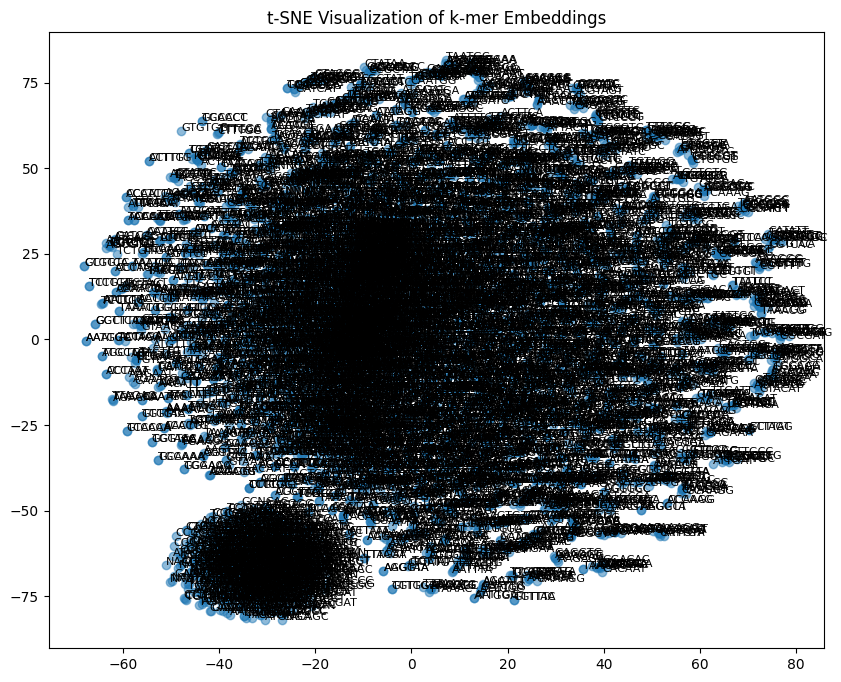

In [21]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Get the vectors for all k-mers
vectors = [model.wv[kmer] for kmer in model.wv.index_to_key]

# Convert the list of vectors to a numpy array
vectors = np.array(vectors)

# Apply t-SNE for dimensionality reduction (reduce to 2D)
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the k-mers in 2D
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)

# Annotate points with their corresponding k-mer
for i, kmer in enumerate(model.wv.index_to_key):
    plt.annotate(kmer, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

plt.title('t-SNE Visualization of k-mer Embeddings')
plt.show()


Due to a large number of k-mers being plotted and labeled, the visualization appears cluttered and unreadable, making it difficult to identify meaningful patterns or clusters. Although t-SNE successfully captures relationships between k-mers, the excessive annotations result in visual noise rather than insight.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


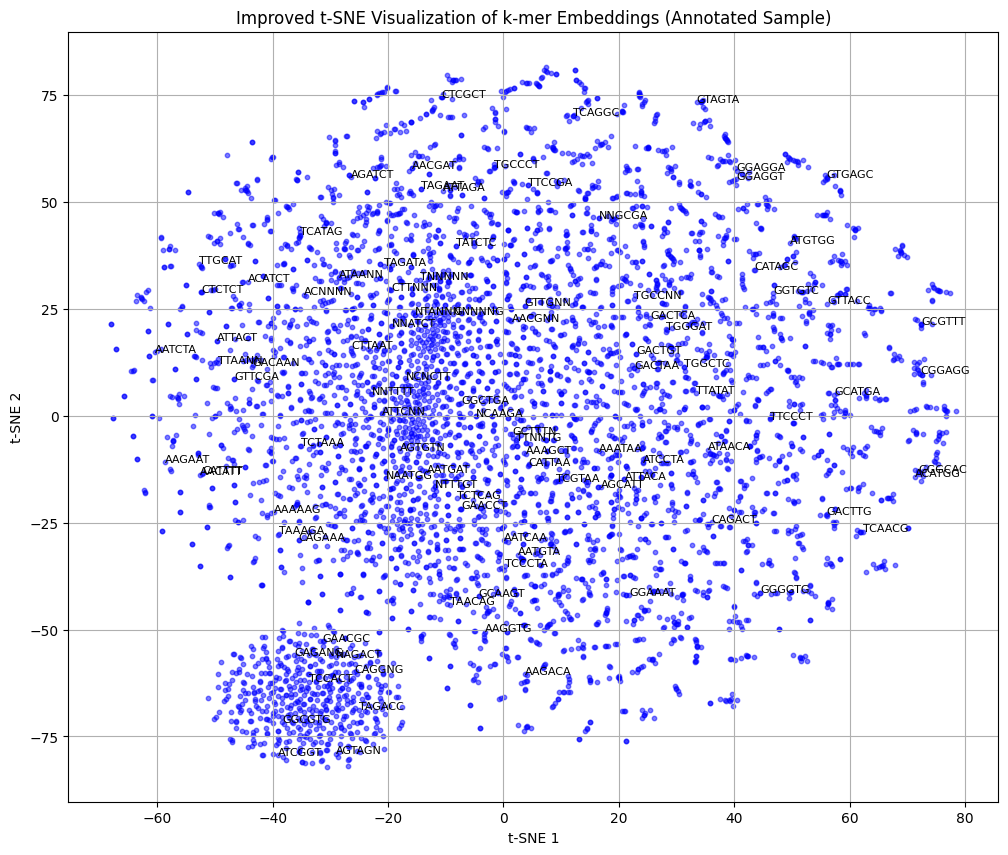

In [22]:
import random

# Get all vectors and k-mers
all_kmers = model.wv.index_to_key
vectors = np.array([model.wv[kmer] for kmer in all_kmers])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(12, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5, s=10, color='blue')

# Randomly annotate 100 k-mers
sample_indices = random.sample(range(len(all_kmers)), 100)
for i in sample_indices:
    plt.annotate(all_kmers[i], (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

plt.title('Improved t-SNE Visualization of k-mer Embeddings (Annotated Sample)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


To make the visualization more informative, we limited the number of annotated k-mers by randomly selecting a small sample of 100. This preserves the overall structure and clustering of k-mers while making individual labels readable.
By decluttering the plot and enlarging its size, the improved visualization now offers a clearer view of how k-mers are distributed and grouped, enhancing interpretability without sacrificing detail.

After this we extract the Word2Vec embeddings/numerical vectors for all k-mers in the model and store them in a NumPy array.
Then print the shape of that array, showing how many k-mers there are and the size of each embedding. This is useful for checking the data before applying clustering or other ML techniques like KMeans.

In [23]:
from sklearn.cluster import KMeans

# Get the Word2Vec embeddings for all k-mers
kmers = list(model.wv.index_to_key)
embedding_vectors = np.array([model.wv[kmer] for kmer in kmers])

# Display the shape of the embeddings (number of k-mers, dimensions)
print(f"Shape of the embedding vectors: {embedding_vectors.shape}")

Shape of the embedding vectors: (5156, 100)


Now perform K-means clustering on a set of k-mer embedding vectors, grouping them into 10 clusters based on their similarity.
This step initializes the K-means algorithm with 10 clusters, fits it to the k-mer embeddings, and then retrieves the cluster labels for each k-mer.

Finally, print the first 10 k-mers along with their assigned cluster labels, this will give us insight into how the k-mers are grouped based on their features.

In [24]:
# Set number of clusters
n_clusters = 10

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embedding_vectors)

# Get the cluster labels for each k-mer
labels = kmeans.labels_

# Print the first 10 k-mers and their corresponding cluster labels
for i in range(10):
    print(f"K-mer: {kmers[i]} | Cluster: {labels[i]}")

K-mer: NNNNNN | Cluster: 4
K-mer: TTGTTA | Cluster: 3
K-mer: TGTTAA | Cluster: 3
K-mer: GGTGTT | Cluster: 0
K-mer: TGTTGT | Cluster: 3
K-mer: TTAAAA | Cluster: 0
K-mer: TTATGA | Cluster: 3
K-mer: TTACAA | Cluster: 7
K-mer: TTTTGT | Cluster: 3
K-mer: TGTTTT | Cluster: 3


Color code based on cluster label.

Apply t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the k-mer embedding vectors to 2D for visualization. Then create a scatter plot where each point represents a k-mer, color-coded based on its cluster label.

The plot below shows how the k-mers are distributed in the reduced 2D space, with a color bar indicating the cluster assignment. The x and y axes correspond to the first and second components of the t-SNE transformation, respectively.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


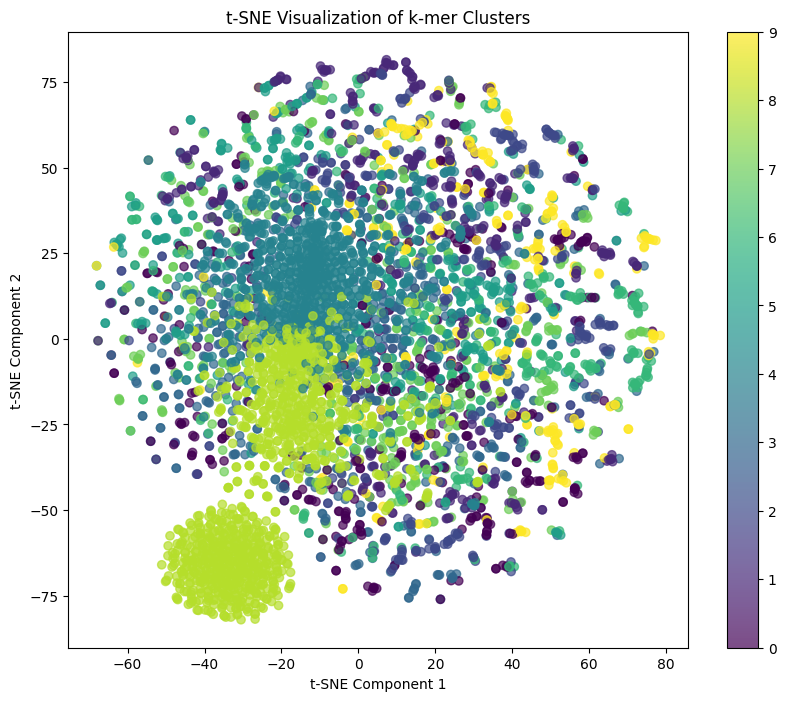

In [25]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_vectors)

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Add a color bar to the plot
plt.colorbar(scatter)
plt.title('t-SNE Visualization of k-mer Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Display the plot
plt.show()


Now we create a dictionary that maps each cluster label to the corresponding k-mers.
At First initialize an empty list for each cluster, then iterate through the cluster labels and append the k-mers to the appropriate cluster list.
Finally, print the first 10 k-mers from each cluster, allowing to see a sample of the k-mers grouped together based on their cluster assignment.

In [26]:
# Create a dictionary that maps cluster labels to k-mers
clustered_kmers = {i: [] for i in range(n_clusters)}
for i, label in enumerate(labels):
    clustered_kmers[label].append(kmers[i])

# Print the k-mers for each cluster
for cluster_num, cluster_kmers in clustered_kmers.items():
    print(f"\nCluster {cluster_num}:")
    print(cluster_kmers[:10])  # Display first 10 k-mers in the cluster


Cluster 0:
['GGTGTT', 'TTAAAA', 'TTTTAA', 'GTTTTA', 'TTTAAA', 'TTTAAT', 'TGGTAA', 'TGCTGT', 'CTTTAA', 'AATGTT']

Cluster 1:
['AAAAGA', 'TGCTAA', 'CTGGTA', 'GCTGGT', 'ACAAAA', 'CAAGAA', 'CAAAAG', 'AAGCTG', 'CAAAAT', 'CAAGCT']

Cluster 2:
['TGTAGA', 'TGCAGA', 'CAGACA', 'CAGATG', 'TTTAGA', 'AGAAGT', 'ACTGTA', 'AGACAT', 'GACAAT', 'CCTAAA']

Cluster 3:
['TTGTTA', 'TGTTAA', 'TGTTGT', 'TTATGA', 'TTTTGT', 'TGTTTT', 'ATTGTT', 'TGCTTT', 'CTTTTG', 'CTTATG']

Cluster 4:
['NNNNNN', 'GATGCA', 'TCCATG', 'ATGACC', 'GGTATG', 'GTATGC', 'AGTCCA', 'AGATTA', 'ACCCAT', 'CGTTTA']

Cluster 5:
['TTCTTA', 'CTTCTT', 'ATTTCA', 'ATTCTT', 'TGACAT', 'ATTTGT', 'ACATTT', 'TTTGCA', 'AAGAAT', 'CTCAAT']

Cluster 6:
['CAATTT', 'ACTTTA', 'ACACTT', 'ATTAAA', 'TTAAAT', 'ACTTCT', 'ACCTTT', 'CTTAAA', 'CTATTA', 'TAAAGA']

Cluster 7:
['TTACAA', 'AAGAAA', 'ACAACA', 'ACAAAT', 'AACAAA', 'CAAATT', 'TAAAAA', 'CAACAA', 'TACAAA', 'ACAACT']

Cluster 8:
['ACCAGA', 'CCTTAC', 'ATATTT', 'AGGAAT', 'AATAGG', 'ACCCAA', 'GAACCA', 'TTCCAA', 'CT

Generate an embedding for a nucleotide sequence by averaging the embeddings of its k-mers. First generate the k-mers of the sequence, then retrieve the embeddings of those k-mers from a pre-trained Word2Vec model. If any k-mers are found in the model, their embeddings are averaged to create a single vector representing the entire sequence. If no k-mers are found in the model, the function returns a zero vector. Then use this function to get the embedding for the first sequence in a list of sequences.

Parameters:
    - sequence: A nucleotide sequence which is a string.
    - model: The trained Word2Vec model.
    - k: Length of k-mers.

This function will return an embedding vector for the sequence.

In [27]:
def get_sequence_embedding(sequence, model, k=6):

    kmers = generate_kmers(sequence, k)
    kmers_embeddings = [model.wv[kmer] for kmer in kmers if kmer in model.wv]

    if len(kmers_embeddings) > 0:
        return np.mean(kmers_embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no k-mers are found in the model

# Get embedding for the first sequence
sequence_embedding = get_sequence_embedding(sequences[0], model)
print(f"Embedding for the first sequence: {sequence_embedding}")

Embedding for the first sequence: [-0.22477838  0.10995251  0.3054615   0.46984866 -0.23456886 -0.7079537
  0.2623604   0.45807418 -0.08029423  0.11856918  0.14478675 -0.427131
 -0.12395297  0.21963042 -0.10474166 -0.26659787 -0.03587188 -0.30719066
 -0.26495054 -0.4794057   0.45331275  0.29290116  0.4666214   0.06754591
  0.53011036  0.14375785 -0.35039365  0.32790676 -0.49922124 -0.11882151
 -0.0247099   0.00215047  0.04747371 -0.37749135  0.2206481   0.18158577
  0.32528964 -0.269045   -0.00305218 -0.6312385  -0.34562865 -0.15598215
 -0.6611397  -0.01979119  0.14812976 -0.15151826 -0.67133623  0.538208
  0.01067154  0.5766893  -0.37611246  0.0753677  -0.50313795 -0.02994685
  0.16899823 -0.12190218  0.58483475 -0.17813636  0.02413468  0.33439475
  0.01636654  0.2026459  -0.32369637  0.07065406 -0.1362471   0.31898734
 -0.38823795  0.05139344 -0.143534   -0.05079775  0.0035133   0.43295974
  0.12787713 -0.57004267  0.1028471   0.04995373  0.24384971 -0.20261407
 -0.3573034  -0.419088

Generate embeddings for all nucleotide sequences using the function, which computes an embedding for each sequence by averaging the embeddings of its k-mers.
It then performs K-means clustering on these sequence embeddings to group the sequences into a specified number of clusters, which is n_clusters. After fitting the K-means model, retrieve the cluster labels for each sequence and print the first few sequence labels to show which cluster each sequence belongs to.

In [28]:
# Generate embeddings for all sequences
sequence_embeddings = np.array([get_sequence_embedding(seq, model) for seq in sequences])

# Perform K-means clustering on sequence embeddings
kmeans_seq = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_seq.fit(sequence_embeddings)

# Get the cluster labels for sequences
sequence_labels = kmeans_seq.labels_

# Print the first few sequence labels
print(f"First few sequence labels: {sequence_labels[:10]}")

First few sequence labels: [0 0 2 0 0 0 9 0 0 7]


Perform hierarchical clustering on a set of k-mer embedding vectors using the linkage function from the scipy.cluster.hierarchy module.

Apply the "ward" method, which minimizes the variance within clusters, to calculate the clustering.

Generate a dendrogram—a tree-like diagram—using the dendrogram function, which visually represents the hierarchical structure of the clustering. The plot shows how k-mers are grouped at different distances, with labels for the axes indicating the k-mers and the distance between clusters.

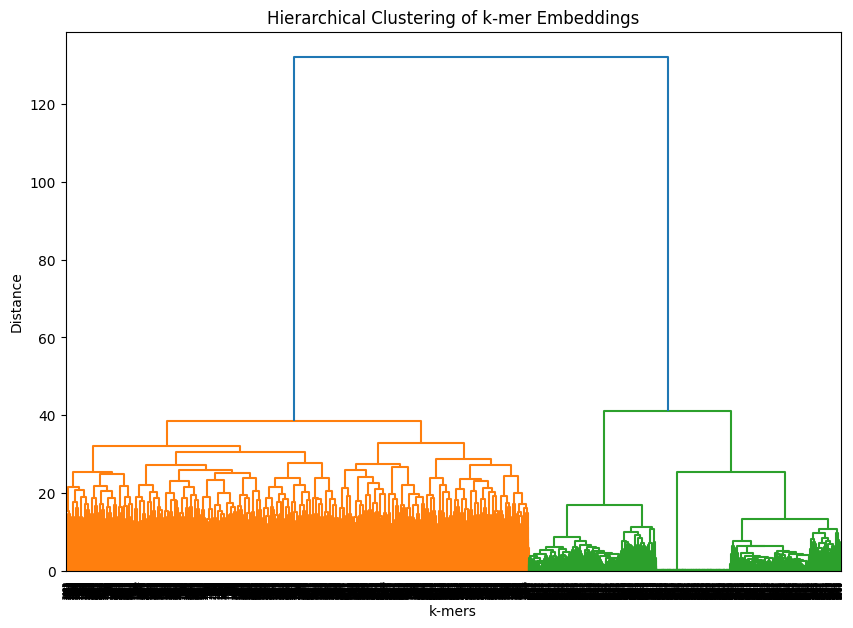

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(embedding_vectors, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering of k-mer Embeddings")
plt.xlabel("k-mers")
plt.ylabel("Distance")
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for k-means clustering
silhouette_avg = silhouette_score(embedding_vectors, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.01850428245961666


Calculate and print the silhouette score for k-means clustering, which measures the quality of clustering based on the separation and cohesion of clusters, with higher values indicating better-defined clusters.
A score of -0.0185 suggests that the clusters are somewhat separated but still have considerable overlap. It indicates that the clustering could potentially be improved, either by adjusting parameters or using a different clustering method.


Calculate and Print the Davies-Bouldin index for k-means clustering, which evaluates the clustering quality by measuring the average similarity ratio of each cluster to its most similar cluster, with lower values indicating better clustering.

A value of 5.39 indicates that the clusters are not well-separated, and the clustering could be significantly improved, as higher values typically imply greater overlap or less distinct groupings between clusters.

In [32]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin index for k-means clustering
db_index = davies_bouldin_score(embedding_vectors, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 5.1612480704985355


Now apply Principal Component Analysis (PCA) to reduce the dimensionality of the k-mer embedding vectors to 2D for visualization. It transforms the high-dimensional embeddings into two principal components, then creates a scatter plot to visualize the reduced embeddings.

Each point in the plot represents a k-mer, color-coded based on its cluster label from the k-means algorithm.

Finally, the plot displays the first and second principal components on the x and y axes, respectively, and includes a color bar to indicate the cluster assignment.

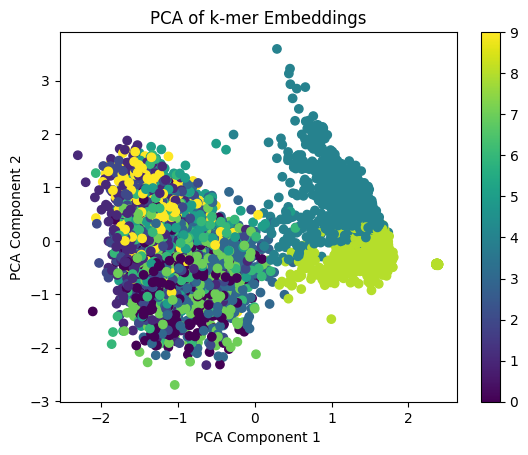

In [31]:
from sklearn.decomposition import PCA

# Apply PCA to reduce embeddings to 2D
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embedding_vectors)

# Plot the PCA components
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("PCA of k-mer Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()